In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from utils import *

## Chargement des données 

In [2]:
train_images, train_labels = load_dataset(test=False, transform=False)
test_images, test_labels = load_dataset(test=True, transform=False)

In [3]:
train_images.shape

(800, 224, 224)

## identifaction des biais

In [4]:
classes = np.unique(train_labels)
moyenne = []
mediane = []
ecart_type = []
for classe in classes:
    
    images_de_classe = train_images[train_labels == classe]

    # Aplatir les images pour calculer les statistiques
    images_aplaties = images_de_classe.reshape(len(images_de_classe), -1)

    # Calculer les statistiques
    moyenne.append(np.mean(images_aplaties, axis=0).reshape(224, 224))
    mediane.append(np.median(images_aplaties, axis=0).reshape(224, 224))
    ecart_type.append(np.std(images_aplaties, axis=0).reshape(224, 224))


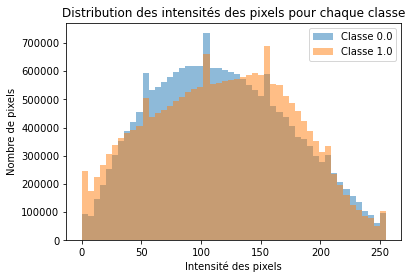

In [5]:
# Nous supposons que train_images et train_labels sont déjà définis
classes = np.unique(train_labels)

# Pour chaque classe, tracer un histogramme des intensités de pixels
for classe in classes:
    # Sélectionner les images de cette classe et les aplatir
    images_de_classe = train_images[train_labels == classe]
    images_aplaties = images_de_classe.reshape(-1)

    # Tracer l'histogramme
    plt.hist(images_aplaties, bins=50, alpha=0.5, label=f'Classe {classe}')

# Configurer le graphique
plt.title('Distribution des intensités des pixels pour chaque classe')
plt.xlabel('Intensité des pixels')
plt.ylabel('Nombre de pixels')
plt.legend()
plt.show()


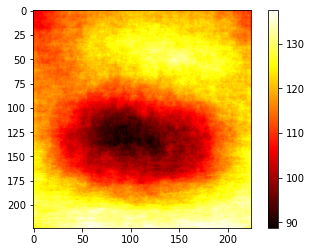

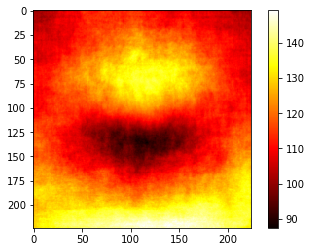

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Nous supposons que train_images et train_labels sont déjà définis
classes = np.unique(train_labels)

# Somme des intensités normalisées pour chaque classe
for classe in classes:
    images_de_classe = train_images[train_labels == classe]

    # Normaliser par le nombre d'images dans la classe actuelle
    train_images_normalized = images_de_classe / len(images_de_classe)

    # Calculer la somme des intensités pour chaque pixel
    somme_intensites = np.sum(train_images_normalized, axis=0)

    # Afficher la somme des intensités sous forme d'image
    if classe == 0 :
        name = 'Hippopotame'
    else :
        name = 'Rhinocéros'
    plt.imshow(somme_intensites, cmap='hot', interpolation='nearest')
    #plt.title(f'Somme des intensités normalisées des pixels - {name}')
    plt.colorbar()
    plt.show()


## Reducation de dimensionnalité

In [7]:
tsne = TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(train_images.reshape(800,-1))

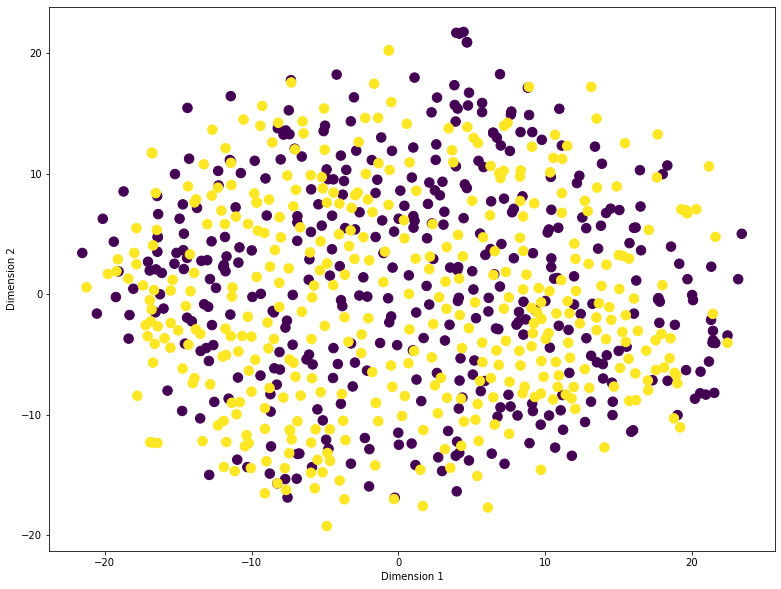

In [8]:
plt.figure(figsize=(13,10))
plt.scatter(transformed_data[:,0] , transformed_data[:,1] , c=train_labels ,s = 90)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
# plt.savefig("tsne_dim.png")
plt.show()